In [2]:
import cv2
import scipy.signal as signal
import scipy.fft as fft

import numpy as np
import matplotlib.pyplot as plt
import skimage.io as skio

from skimage.color import rgb2gray

<h2>Part 1</h2>

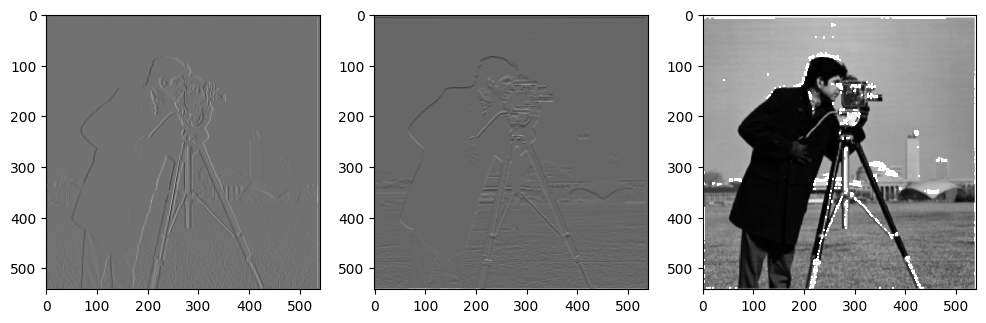

In [85]:
# Q1.1
# Partial x and y derivatives

img = skio.imread("../images/cameraman.png")
img = rgb2gray(img[:,:,:3])
# plt.imshow(img)

D_x = np.tile(np.array([1,-1])[None,:], [3, 1]) / 2
D_y = np.tile(np.array([1,-1]).T[:,None], [1, 3]) / 2

# Dx
img_D_x = signal.convolve2d(img, D_x, mode="same")

# Dy
img_D_y = signal.convolve2d(img, D_y, mode="same")

# TODO
# Edge Filtering
magnitude_vec = np.sqrt((D_x**2) + (D_y.T**2))
img_edge = signal.convolve2d(img, magnitude_vec, mode="same")

img_binarize = np.ma.masked_inside(img_edge, 810, 850, copy=True)
# print(img_binarize)

plt.figure(figsize=(12, 4))
plt.subplot(131); plt.imshow(img_D_x, cmap="gray")
plt.subplot(132); plt.imshow(img_D_y, cmap="gray")
plt.subplot(133); plt.imshow(img_binarize, cmap="gray")

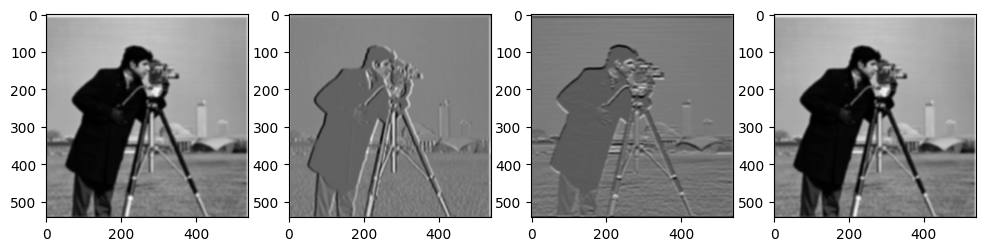

In [95]:
# Q1.2
# Gaussian Kernel
gauss_2d_kernel = cv2.getGaussianKernel(10, 3) * cv2.getGaussianKernel(10, 3).T

# Convolution
img_gauss = signal.convolve2d(img, gauss_2d_kernel, mode="same")

# Gauss D_x
gauss_D_x = signal.convolve2d(gauss_2d_kernel, D_x, mode="same")
img_gauss_D_x = signal.convolve2d(img, gauss_D_x, mode="same")

# Gauss D_y
gauss_D_y = signal.convolve2d(gauss_2d_kernel, D_y, mode="same")
img_gauss_D_y = signal.convolve2d(img, gauss_D_y, mode="same")

# TODO
# Gauss Edge Filtering
img_gauss_both = signal.convolve2d(img, np.matmul(gauss_D_x, gauss_D_y), mode="same")

plt.figure(figsize=(12, 4))
plt.subplot(141); plt.imshow(img_gauss, cmap="gray")
plt.subplot(142); plt.imshow(img_gauss_D_x, cmap="gray")
plt.subplot(143); plt.imshow(img_gauss_D_y, cmap="gray")
plt.subplot(144); plt.imshow(img_gauss_both, cmap="gray")

Differences: The gaussian filter applied on the partial derivatives x and y retain different brightness values, whereas the regularly convoluted images are converted to a single grayscale color.

TODO: Add diff for edge filtering

<h2>Part 2</h2>

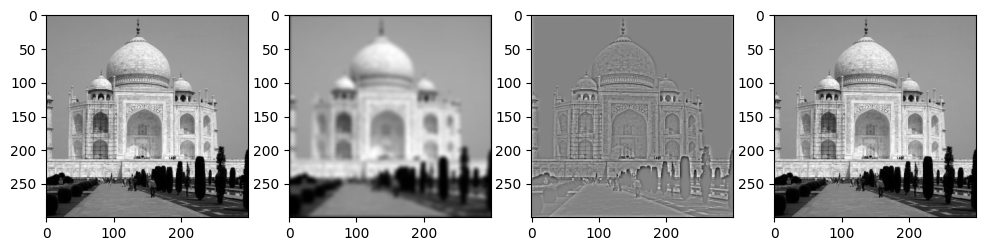

In [115]:
# Q 2.1
img = skio.imread("../images/taj.jpg")
img = rgb2gray(img[:,:,:3])

img_gauss = signal.convolve2d(img, gauss_2d_kernel, mode="same")
details = img - img_gauss
alpha = 1
img_sharpened = img_gauss + (alpha * details)

# TODO: Add custom images

plt.figure(figsize=(12, 4))
plt.subplot(141); plt.imshow(img, cmap="gray")
plt.subplot(142); plt.imshow(img_gauss, cmap="gray")
plt.subplot(143); plt.imshow(details, cmap="gray")
plt.subplot(144); plt.imshow(img_sharpened, cmap="gray")